<a href="https://colab.research.google.com/github/rpedram/data-science/blob/main/linear_regression_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Q1. Housing Price Prediction

Dataset Description: The data pertains to the houses found in each California district and some summary statistics about them based on the 1990 census data. It contains one instance per district block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

The goal of this task is to design a regression model to predict the median house value conditioned upon a set of input attributes corresponding to a particular California district block.

The attributes in the dataset are as follows; their names are self-explanatory:
     

    longitude (continuous): One of the coordinates that are used to identify the California district block
     

    latitude (continuous): One of the coordinates that are used to identify the California district block
     

    housing_median_age (continuous): Average age of the house in California district block
     

    total_rooms (continuous): Total number of rooms of all the houses in the California district block
     

    total_bedrooms (continuous): Total number of bedrooms of all the houses in the California district block
     

    population (continuous): Number of people residing in the district block
     

    households (continuous): Number of families in the district block
     

    median_income (continuous): Median income for households in the district block of houses (measured in tens of thousands of US Dollars)  
     

    ocean_proximity (categorical): Location of the house. Is it inland, near the bay, near the ocean, etc.  
     

    median_house_value.(continuous): Median house value within a district block (measured in US Dollars)

Our target variable will be median_house_value.  Use the rest of the fields mentioned above to predict the median_house_value.

## Import Libraries
Import all necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,explained_variance_score,mean_absolute_error,r2_score
from sklearn.decomposition import PCA
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

### b. Data Loading / Preprocessing

#### i. Loading

1. Load the California housing dataset using `pandas.read_csv()` function and store it in the variable (i.e., a pandas dataframe) named `df’.

2. The resulting data frame should have the shape (20640, 10) indicating that there are 20640 rows and 10 columns.

In [2]:

import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get the file path from Google Drive
file_path = '/content/drive/My Drive/Dataset/ml_class/housing.csv'

# Read the file into a Pandas DataFrame
df = pd.read_csv(file_path)
print(df.head())
print(df.info())
# Describe numerical variables to check for missing values, outliers, etc.
print(df.describe())

print(df.info())

Mounted at /content/drive
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

Df is correctly captured (20640, 10)

In [3]:
df.shape
#Check dtypes
df.dtypes
#All float less ocean_proximity

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

3. Find the missing values in the data frame. If any (i.e., even if one column in each instance / row has a missing value), drop the row using `pandas.DataFrame.dropna()` function. The resulting data frame should have the shape (20433, 10) indicating that there are 20433 rows and 10 columns.

In [ ]:
df.isna().sum(axis=0)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Drop the null value rows in total_bedrooms. Inplace = true is required else the index wont be in line. If you dont use that reassign df=df.dropna()

In [4]:
df.dropna(how='any',inplace=True)

shape correct

In [5]:
#check df again
df.isna().sum(axis=0)
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


4. Create a data frame `corr_df` by dropping the columns latitude, longitude, and ocean_proximity using the `pandas.DataFrame.drop()` function. Use the Pearson correlation to find the correlation of each remaining feature in the `corr_df` with the target variable `median_house_value` using the function `pandas.DataFrame.corrwith()`.

corr() function by default takes only numeric data. Drop unnccesary columns

In [ ]:
# Create a new data frame excluding the specified columns
corr_df = df.drop(columns=['latitude', 'longitude', 'ocean_proximity'])

# Calculate correlation with the target variable
corr = corr_df.corrwith(corr_df['median_house_value'])

# Print the correlation coefficients
print(corr)

housing_median_age    0.106432
total_rooms           0.133294
total_bedrooms        0.049686
population           -0.025300
households            0.064894
median_income         0.688355
median_house_value    1.000000
dtype: float64


#### ii. Data Visualization

1. Use `pandas.DataFrame.hist(bins = 50)` function for visualizing the variation on the columns housing_median_age, total_rooms, total_bedrooms, population, household, median_income and median_house_value. Plot each histogram as a separate subplot.

#### Use subplot in plotting
We can make grid of plots. Max row size is 4 practically for std screen in colabs. Run all features in loop. Easy visualisation in single screen. Can change to a 2x2 grid for more clarity.

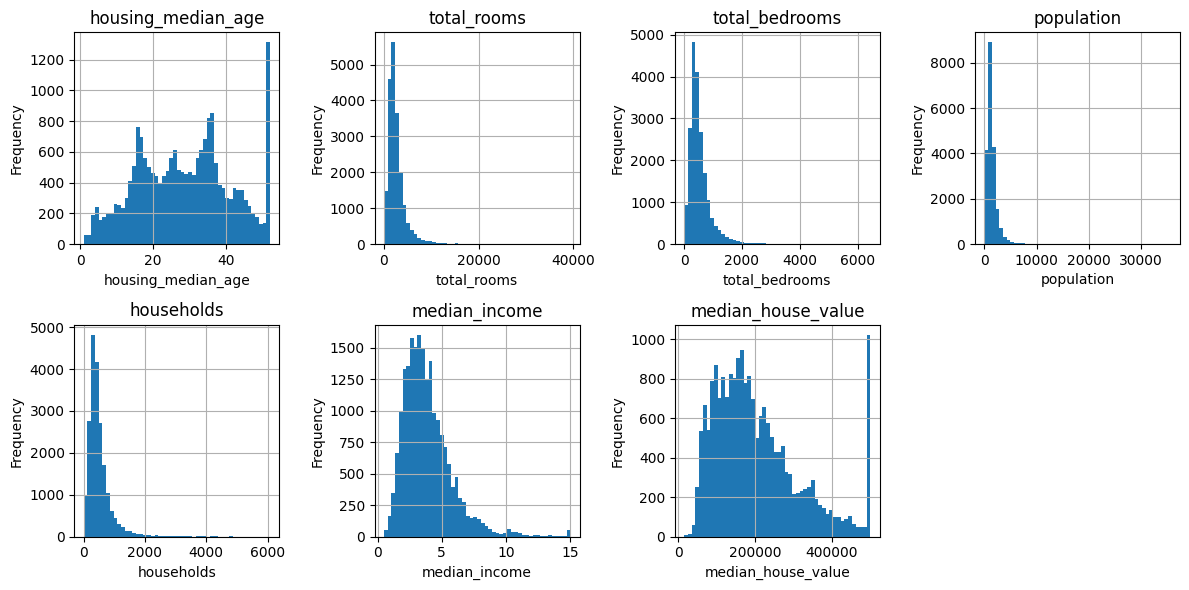

In [ ]:
# Create separate subplots for each feature's histogram
plt.figure(figsize=(12, 6))

# Define features to visualize
features = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

for i, feature in enumerate(features):
    plt.subplot(2, 4, i+1)  # Create a subplot at position i+1 in a 2x4 grid
    df[feature].hist(bins=50)  # Generate histogram with 50 bins
    plt.title(feature)  # Add title as the feature name
    plt.xlabel(feature)  # Label x-axis as the feature name
    plt.ylabel('Frequency')  # Label y-axis as 'Frequency'

plt.tight_layout()  # Adjust spacing between subplots
plt.show()  # Display the plot

2. Use `pandas.dataframe.describe()` function to find the mean, median and standard deviations for each feature and report in the jupyter notebook.

In [6]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

Create a data frame `X` of features (by dropping the column `median_house_value` from the original data frame) using the `pandas.DataFrame.drop()` function. Create a Series object of targets `Y` (by only considering the `median_house_value` column from the original data frame (Do NOT use the `corr_df` data frame in this step. Use the data frame which was obtained as a result of step 3 above).

In [7]:
# Create a DataFrame X of features by dropping the target variable 'median_house_value'
X = df.drop(columns=['median_house_value', 'longitude', 'latitude'])

# Create a Series object Y of targets by selecting the 'median_house_value' column
y = df['median_house_value']

# Print the Dataframe X and Series Y to verify
print("DataFrame X:")
print(X)
print("\nSeries Y:")
print(y)
# Confirm shape of df rows should be same
X.shape
y.shape

DataFrame X:
       housing_median_age  total_rooms  total_bedrooms  population  \
0                    41.0        880.0           129.0       322.0   
1                    21.0       7099.0          1106.0      2401.0   
2                    52.0       1467.0           190.0       496.0   
3                    52.0       1274.0           235.0       558.0   
4                    52.0       1627.0           280.0       565.0   
...                   ...          ...             ...         ...   
20635                25.0       1665.0           374.0       845.0   
20636                18.0        697.0           150.0       356.0   
20637                17.0       2254.0           485.0      1007.0   
20638                18.0       1860.0           409.0       741.0   
20639                16.0       2785.0           616.0      1387.0   

       households  median_income ocean_proximity  
0           126.0         8.3252        NEAR BAY  
1          1138.0         8.3014        NEAR

(20433,)

In [ ]:
X.columns

Index(['housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
       'households', 'median_income', 'ocean_proximity'],
      dtype='object')

In [8]:
df['ocean_proximity'].nunique()
# I have 5 categories in original df under ociean proximity
df['ocean_proximity'].unique()


array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

3. Use `pandas.get_dummies` to convert categorical variables into dummy /one-hot encoding. In this case the categorical column is ocean_proximity

In [9]:
# One-hot encode the 'ocean_proximity' column
X = pd.get_dummies(X, columns=['ocean_proximity'])

print(X)
X.shape


       housing_median_age  total_rooms  total_bedrooms  population  \
0                    41.0        880.0           129.0       322.0   
1                    21.0       7099.0          1106.0      2401.0   
2                    52.0       1467.0           190.0       496.0   
3                    52.0       1274.0           235.0       558.0   
4                    52.0       1627.0           280.0       565.0   
...                   ...          ...             ...         ...   
20635                25.0       1665.0           374.0       845.0   
20636                18.0        697.0           150.0       356.0   
20637                17.0       2254.0           485.0      1007.0   
20638                18.0       1860.0           409.0       741.0   
20639                16.0       2785.0           616.0      1387.0   

       households  median_income  ocean_proximity_<1H OCEAN  \
0           126.0         8.3252                      False   
1          1138.0         8.3014 

(20433, 11)

Check shape from above. One hot shoud have deleted the original colum and made 5 additional instead based on category. Original df shape incr by 4 columns

#### iii. Data Splitting

1. Split data into training and test sets using the sklearn `train_test_split()` function. Perform 70-30 distribution i.e. 70% training and 30% testing. The result of your data split should yield 4 separate data frames `X_train, X_test, y_train, y_test`. (respectively, the training features, testing features, training targets and testing target).

In [ ]:
# Perform the split (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### iv. Data Scaling

1. Use the `StandardScaler()` to instantiate the standard scaler class. Note: You will need two separate scaler objects, one to scale the features, another to scale the target values.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Assuming you have your X_train, X_test, y_train, y_test from the previous step

# Create scaler for features
scaler_features = StandardScaler()

# Fit the scaler to the training features (learn mean and standard deviation)
#Using fit_transform instead of seperate fit and transform functions.

# Apply the scaler to both training and testing features
X_train_scaled = scaler_features.fit_transform(X_train)
X_test_scaled = scaler_features.transform(X_test)

# Create a separate scaler for the target variable
scaler_target = StandardScaler()



# Apply the scaler to training and testing targets
# Convert the target variable which is single colum into a 2D array
y_train_scaled = scaler_target.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_target.transform(y_test.values.reshape(-1, 1))
y_train_scaled.shape # Check the shape of the Ytrain it should be (no of rows,1) 2d array

(14303, 1)

In [ ]:
X_train_scaled.shape

(14303, 11)

2. For each scaler, employ the `fit_transform()` function (only on the training  features, training targets) of the scaler to retrieve the new (scaled) version of the data. Store them in `X_train`, and `y_train` again

3. Scale the `X_test` and `y_test` as well and store the scaled values back in `X_test` and `y_test`. (i.e., use the appropriate “fitted” scaler above to “transform” the test data. Note: the function to be employed in this case is `transform()` as opposed to `fit_transform()`).  
Henceforth, `X_train, y_train, X_test, y_test` will refer to the scaled data unless stated otherwise.

i have kept the names seperate from scaled and unscaled data to understand what the transformation has done

### c. Modelling

#### i. Employ Linear Regression from sklearn.linear_model, and instantiate the model.

#### ii. Once instantiated, `fit()` the model using the scaled `X_train, y_train` data.

#### iii. Employ the `predict()` function to obtain predictions on `X_test`. Store the predictions in a variable named `y_preds`. Note: Since the model has been trained on scaled data (i.e., both features and targets, the predictions will also be in the “scaled” space. We need to transform the predictions back to the original space).

In [ ]:
from sklearn.linear_model import LinearRegression

# A. Instantiate the model
model = LinearRegression()

# B. Fit the model
model.fit(X_train_scaled, y_train_scaled)

# C Make predictions on the testing set
y_preds_scaled = model.predict(X_test_scaled)

# D. Inverse transform the predictions (back to the original scale)
y_preds_lr = scaler_target.inverse_transform(y_preds_scaled)


## Early stopping
Logic:
* Prevents Overfitting:  Overfitting occurs when your model learns the training data too well and doesn't generalize to new data. Early stopping helps prevent this by stopping training before the model starts memorizing the training data's noise and peculiarities.

* Saves Time:  Training a complex model can take a long time. Early stopping can significantly reduce training time if it's clear that the model isn't improving.

* This doesnt really work for linear regression but for more complex model will deliver results.

Execution:

* Split your trg set further keeping 20 % for validation.
* set parameter for delta= significant improvement in MSE which is my eval metrics, sent epochs= no of times the fitting in done with improvement. Set patence- times the refitting is done without sognificant improvement
* run the fitting in a conditional loop to a point there is no significant improvement.

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np


# Perform the split (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize your data
scaler_features = StandardScaler()
scaler_target = StandardScaler()
X_train_scaled = scaler_features.fit_transform(X_train)
y_train_scaled = scaler_target.fit_transform(y_train.values.reshape(-1, 1))
X_test_scaled = scaler_features.transform(X_test)
y_test_scaled = scaler_target.transform(y_test.values.reshape(-1, 1))

# A. Instantiate the model
model = LinearRegression()

# B. Create a validation set
X_train_scaled, X_val_scaled, y_train_scaled, y_val_scaled = train_test_split(
    X_train_scaled, y_train_scaled, test_size=0.2, random_state=42
)
# Split is on the scaled data

# Early Stopping Parameters (You can adjust these)
min_delta = 0.001  # Minimum improvement in validation loss to consider
patience = 5       # Number of epochs to wait without improvement

# Track the best validation loss and when it occurred
best_val_loss = float("inf")
epochs_without_improvement = 0
current_epoch = 0

# B.  Iteratively fit the model with early stopping
while True:
    model.fit(X_train_scaled, y_train_scaled)

    # C. Make predictions on the validation set
    y_val_pred_scaled = model.predict(X_val_scaled)
    val_loss = mean_squared_error(y_val_scaled, y_val_pred_scaled)

    current_epoch += 1

    # Early stopping check
    if val_loss < best_val_loss - min_delta:
        best_val_loss = val_loss
        epochs_without_improvement = 0
    else:
        epochs_without_improvement += 1
        if epochs_without_improvement >= patience:
            print("Early stopping at epoch:", current_epoch)
            break

# C. Make predictions on the testing set (Use the model trained up to the best epoch)
y_preds_scaled = model.predict(X_test_scaled)

# D. Inverse transform the predictions (back to the original scale)
y_preds_lr = scaler_target.inverse_transform(y_preds_scaled)
# E- Impact of early stopping
print(f'The best MSE score(scaled) on validation data is {best_val_loss:0.2f}')

Early stopping at epoch: 6
The best MSE score(scaled) on validation data is 0.35


### Run Evaluation for early stopping

#### iv. Use `inverse_transform()` function to convert the normalized data (`y_preds` ) to original scale. Store the transformed values back into `y_preds`.

In [ ]:
# transform predictions back to original space
#y_preds = scaler_y.inverse_transform(y_preds)

### d. Evaluation

#### i. Plot a scatter plot using matplotlib.pyplot.scatter function. Plot the predicted median house values on the y-axis vs the actual median house values on the x-axis

#### ii. Calculate MAPE, RMSE and R2 for the model and report them in the following table.  
Hint: for RMSE set the squared parameter to False.

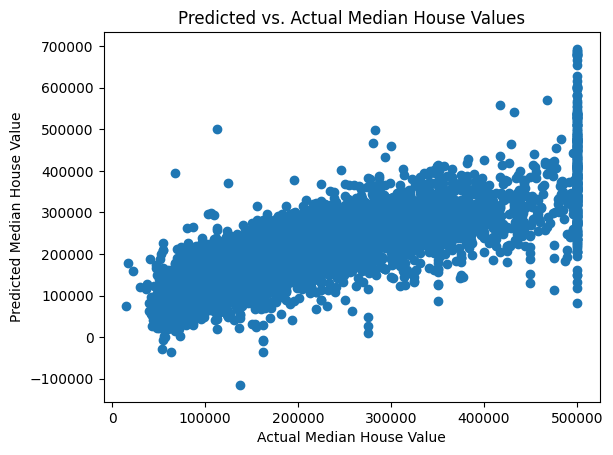

Evaluation Metrics:
MAPE      : 0.29
RMSE      : 69260.52
R-squared : 0.64
 the MSE for modl is 0.3600960653535997


In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

# i. Scatter plot of predicted vs. actual values
plt.scatter(y_test, y_preds_lr)
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Predicted vs. Actual Median House Values')
plt.show()

# ii. Performance metrics
mape = mean_absolute_percentage_error(y_test, y_preds_lr)
rmse = mean_squared_error(y_test, y_preds_lr, squared=False)  # RMSE
r2 = r2_score(y_test, y_preds_lr)

# Print metrics in a table format
print("Evaluation Metrics:")
print(f"{'MAPE':<10}: {mape:.2f}")
print(f"{'RMSE':<10}: {rmse:.2f}")
print(f"{'R-squared':<10}: {r2:.2f}")
print(f' the MSE for modl is {mean_squared_error(y_test_scaled, y_preds_scaled)}')
# Can compare this with the early stopping score

In [ ]:
# Import the function learning_curve
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, title, ylim=None, cv=None, n_jobs=None,
                        train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Plots a learning curve with the fill of standard deviation.
    ylim is tuple that gives the range of the y axis for plotting. If sent iin the function call.
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("MSE")  # Using MSE as our performance measure

    # Calculate the negative MSE to make the scores higher is better
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes,
        scoring='neg_mean_squared_error')
    train_scores_mean = -train_scores.mean(axis=1)
    train_scores_std = train_scores.std(axis=1)
    test_scores_mean = -test_scores.mean(axis=1)
    test_scores_std = test_scores.std(axis=1)

    # Plot the learning curve with the fill of standard deviation
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color='r')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1,
                     color='g')
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r',
             label='Training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g',
             label='Cross-validation score')
    plt.legend(loc='best')
    plt.show()

## Plot the learning curve

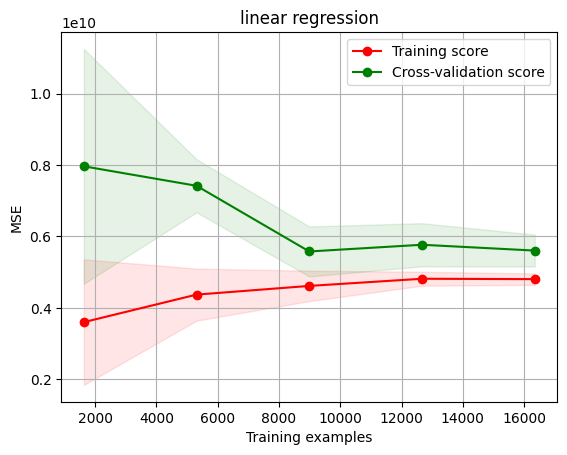

In [ ]:
mostplot_learning_curve(model,X,y, 'linear regression')

The learning curve shows a bit of over fitting as it is not converging. Can use Ridge or lasso regression and compare models

# Using Ridge and Lasso regression
Use the ridge and lasso and set the parameter alpha
Use hyper parameter tuning with grid search to set the optimal alpha for each model

## Hyper parameter tuning
We can use GridSearch CV for any algo in genral. In case od ridge and Lasso we can use the RidgeCV ot LassoCV. Syntax
ridge_cv = RidgeCV(alphas=(0.01, 1, 10), cv=5)  # Use alpha range(in log scale) and cv folds genrally 5
ridge_cv.fit(X_train, y_train)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso

# Define a set of alphas to be used in lasso and ridge models
alphas = [0.01, 0.1, 1, 5, 10, 20]

# Define parameter grids for Ridge and Lasso
ridge_params = {'alpha': alphas}
lasso_params = {'alpha': alphas}

# Setup cross-validation with RMSE scoring
ridge_cv = GridSearchCV(Ridge(), ridge_params, scoring='neg_mean_squared_error', cv=5)
lasso_cv = GridSearchCV(Lasso(), lasso_params, scoring='neg_mean_squared_error', cv=5)

# Fit the models using cross-validation
ridge_cv.fit(X_train_scaled, y_train_scaled)
lasso_cv.fit(X_train_scaled, y_train_scaled)

# Find the best models and their parameters
best_ridge = ridge_cv.best_estimator_
best_lasso = lasso_cv.best_estimator_

print("Best Ridge:", best_ridge)
print("Best Lasso:", best_lasso)


Best Ridge: Ridge(alpha=20)
Best Lasso: Lasso(alpha=0.01)


The ridge used a alpha of 20 for the best model and Lasso used 0.01
The tabulate function is a nifty tool. For getting well formatted data

In [ ]:
from sklearn.linear_model import LinearRegression
from tabulate import tabulate
from math import sqrt

# Predicted score of Ridge and Lasso
y_preds_ridge_scaled = best_ridge.predict(X_test_scaled)
y_preds_lasso_scaled = best_lasso.predict(X_test_scaled)
y_preds_lasso_scaled.shape
# Invert the ridge and Lasso prediction
y_preds_ridge = scaler_target.inverse_transform(y_preds_ridge_scaled.reshape(-1,1))
y_preds_lasso = scaler_target.inverse_transform(y_preds_lasso_scaled.reshape(-1,1))
# Compare using metrics
from sklearn.metrics import mean_squared_error, r2_score
# Calculate metrics for each model
results = []


results.append(['Linear Regression', mean_absolute_error(y_test, y_preds_lr),mean_squared_error(y_test, y_preds_lr),explained_variance_score(y_test, y_preds_lr),
                sqrt(mean_squared_error(y_test, y_preds_lr)), r2_score(y_test, y_preds_lr), "Not Applicable"])

results.append(['Ridge', mean_absolute_error(y_test, y_preds_ridge),mean_squared_error(y_test, y_preds_ridge), explained_variance_score(y_test, y_preds_ridge),
                sqrt(mean_squared_error(y_test, y_preds_ridge)),r2_score(y_test, y_preds_ridge), best_ridge.alpha])

results.append(['Lasso', mean_absolute_error(y_test, y_preds_lasso),mean_squared_error(y_test, y_preds_lasso),explained_variance_score(y_test, y_preds_lasso),
                sqrt(mean_squared_error(y_test, y_preds_lasso)), r2_score(y_test, y_preds_lasso), best_lasso.alpha])

# Create the table using tabulate
table = tabulate(results, headers=["Model", "MAE","MSE","Explained Variance", "RMSE",  "R-squared", "Alpha"], tablefmt='grid')
print(table)


+-------------------+---------+-------------+----------------------+---------+-------------+----------------+
| Model             |     MAE |         MSE |   Explained Variance |    RMSE |   R-squared | Alpha          |
+===================+=========+=============+======================+=========+=============+================+
| Linear Regression | 50431.4 | 4.78396e+09 |             0.641139 | 69166.2 |    0.641138 | Not Applicable |
+-------------------+---------+-------------+----------------------+---------+-------------+----------------+
| Ridge             | 50448.1 | 4.78525e+09 |             0.641042 | 69175.5 |    0.641042 | 20             |
+-------------------+---------+-------------+----------------------+---------+-------------+----------------+
| Lasso             | 50983.7 | 4.872e+09   |             0.634537 | 69799.7 |    0.634534 | 0.01           |
+-------------------+---------+-------------+----------------------+---------+-------------+----------------+


## Inference
The best performing model is the linear regression. There is hardly a change. Lasso regression has low alpha meaning very minimal change in error coeff and all features of original model considered. Ridge shows that small change in alpha improved the model.

### Action for further analysis
Consider changing alpha list as per logarithmic scale.
Feature engineering.
Get list of priority features. This output does not give any idea of the coeff having impact.

### Extract features of importance

Imp learning- list has to be changed to a np to get index. the model coeff result has to be flattened

median_income                 0.666818
population                    0.340284
total_bedrooms                0.320039
households                    0.210503
ocean_proximity_INLAND        0.197902
total_rooms                   0.145172
housing_median_age            0.132409
ocean_proximity_NEAR OCEAN    0.091598
ocean_proximity_<1H OCEAN     0.084096
ocean_proximity_NEAR BAY      0.060214
ocean_proximity_ISLAND        0.023745
dtype: float64


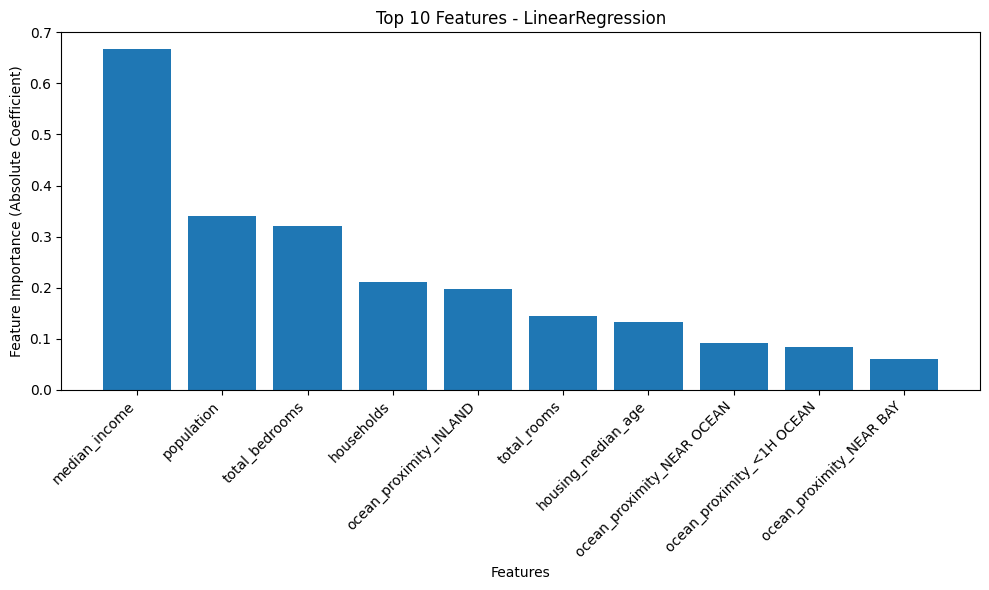

In [ ]:
import pandas as pd

# using the already fitted linear model with features in 'X'
feature_names = X.columns
# Convert feature_names to a NumPy array
feature_names_array = np.array(feature_names)

# Create the pandas Series
coefs = pd.Series(model.coef_.flatten(), index=feature_names_array)
#Coefs is now a iD array with index as feature

print(coefs.abs().sort_values(ascending=False))
# Select top features (adjust the number as desired)
top_n = 10
top_features = coefs.abs().sort_values(ascending=False)[:top_n]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_features.index, top_features.values)
plt.xlabel('Features')
plt.ylabel('Feature Importance (Absolute Coefficient)')

# Add model name to title
model_name = model.__class__.__name__
plt.title(f'Top {top_n} Features - {model_name}')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
print(type(model.coef_))
print(model.coef_.shape)
print(type(feature_names))
print(feature_names)
coefs.shape

<class 'numpy.ndarray'>
(1, 11)
<class 'pandas.core.indexes.base.Index'>
Index(['housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
       'households', 'median_income', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')


(11,)

Use SVC for the above

## SVR Alogo in Grid search

The code runs the svr algo with grid search. With range of parameters.
The best model is best_svr gives model with least MSE.
This alo takes a huge time to run keep the parameter list limited. This can take more than a hour.

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# Using your previous data (X, y) and X_train, X_test, y_train, y_test

# Define pipeline steps (unchanged)
steps = [
    ('scaler', StandardScaler()),
    ('rfe', RFE(estimator=LinearRegression(), n_features_to_select=5)),
    ('svr', SVR())
]

# Parameters for grid search
param_grid = {
    'svr__kernel': ['linear', 'poly', 'rbf'],
    'svr__C': [0.1, 1],  # Sample C values
    'svr__epsilon': [0.01, 0.1]  # Sample epsilon values
}

# Create the pipeline
pipeline = Pipeline(steps)

# Grid Search for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to your training data
grid_search.fit(X_train, y_train)

# Best model
best_svr = grid_search.best_estimator_
print(best_svr)

# Make predictions using the best model
y_preds_svr = best_svr.predict(X_test)


Pipeline(steps=[('scaler', StandardScaler()),
                ('rfe',
                 RFE(estimator=LinearRegression(), n_features_to_select=5)),
                ('svr', SVR(C=1, kernel='linear'))])


In [ ]:
#Add the results of the svc to the mainresults table
results.append(['SVR Regression hyper2', mean_absolute_error(y_test, y_preds_svr),mean_squared_error(y_test, y_preds_svr),explained_variance_score(y_test, y_preds_svr),
                sqrt(mean_squared_error(y_test, y_preds_svr)), r2_score(y_test, y_preds_svr), "Not Applicable"])

# Create the table using tabulate
table2 = tabulate(results, headers=["Model", "MAE","MSE","Explained Variance", "RMSE",  "R-squared", "Alpha"], tablefmt='grid')
print(table2)

## Inference
The svr had degraded the model performance. Result needs to be analysed further.